In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
#import spacy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
#import xgboost as xgb

In [2]:
df=pd.read_csv("../../data/00-raw-data/apple_iphone_11_reviews.csv")

In [3]:
# data cleaning

In [4]:
#check null
df.isna().sum()

index              0
product            0
helpful_count      0
total_comments     0
url                0
review_country     0
reviewed_at        0
review_text        3
review_rating      0
product_company    0
profile_name       0
review_title       2
dtype: int64

In [5]:
#drop null
df.dropna(inplace=True)

In [6]:
# drop unnecessary columns
df.drop(['helpful_count','total_comments','url','product_company','profile_name'],axis=1)

,index,product,review_country,reviewed_at,review_text,review_rating,review_title
0,0,Apple iPhone XR (64GB) - Black,India,2018-12-12,NOTE:,3.0 out of 5 stars,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Excellent Battery life and buttery smooth UI
...,...,...,...,...,...,...,...
5005,5005,Apple iPhone XR (64GB) - Black,India,2019-11-13,Dhamaka,4.0 out of 5 stars,Dhamaka phone
5006,5006,Apple iPhone XR (64GB) - Black,India,2019-11-15,Goodbye,4.0 out of 5 stars,Good
5007,5007,Apple iPhone XR (64GB) - Black,India,2019-12-29,Nothing,5.0 out of 5 stars,Fantabulous phone. Easy to use.
5008,5008,Apple iPhone XR (64GB) - Black,India,2019-11-10,Superbb,5.0 out of 5 stars,Fantastic


In [7]:
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [8]:
# make a rating column to show the ratings for each review
df['rating'] = df['review_rating'].str.split().str[0].astype(float)
df.drop(['review_rating'],axis=1)


,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,product_company,profile_name,review_title,rating
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",3.0
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,1.0
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,Apple,A,Happy with the purchase,5.0
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1.0
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5005,5005,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-13,Dhamaka,Apple,Shreya,Dhamaka phone,4.0
5006,5006,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-15,Goodbye,Apple,murali hv,Good,4.0
5007,5007,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-12-29,Nothing,Apple,Manish,Fantabulous phone. Easy to use.,5.0
5008,5008,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-10,Superbb,Apple,basil john p,Fantastic,5.0


In [9]:
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,rating
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",3.0
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,1.0
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase,5.0
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1.0
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,5.0


In [10]:
df.rating.value_counts()

5.0    3730
4.0     718
1.0     319
3.0     153
2.0      87
Name: rating, dtype: int64

In [11]:
df['rating'].describe()

count    5007.000000
mean        4.488516
std         1.086279
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

<Axes: xlabel='rating', ylabel='Count'>

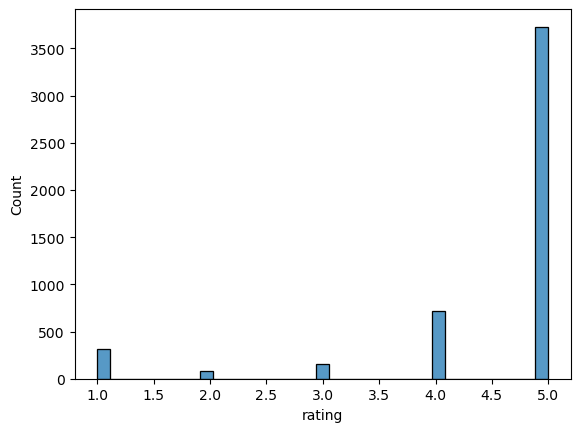

In [12]:
sns.histplot(df['rating'])

In [13]:
# creating labels
def categorize_rating(rating):
    if rating < 2:
        return "negative"
    elif rating >= 2 and rating < 4:
        return "natural"
    else:
        return "positive"
    
df['sentiment'] = df['rating'].apply(categorize_rating)

In [14]:
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,rating,sentiment
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",3.0,natural
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,1.0,negative
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase,5.0,positive
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1.0,negative
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,5.0,positive


In [15]:
df.sentiment.value_counts()

positive    4448
negative     319
natural      240
Name: sentiment, dtype: int64

In [16]:
df.describe()

,index,total_comments,rating
count,5007.000000,5007.000000,5007.000000
mean,2503.578191,0.030957,4.488516
std,1446.164582,0.589596,1.086279
min,0.000000,0.000000,1.000000
25%,1251.500000,0.000000,4.000000
50%,2503.000000,0.000000,5.000000
75%,3755.500000,0.000000,5.000000
max,5009.000000,24.000000,5.000000


# NLP

In [17]:
import re

def string_cleaner(input_string):
    try:
        # Replace punctuation characters with spaces
        out = re.sub(r'[^\w\s]', ' ', input_string)

        # Remove one or more consecutive whitespaces and convert to lowercase
        out = re.sub(r'\s+', ' ', out).strip().lower()
    except:
        print("ERROR")
        out = ''
    return out

In [18]:
df['combined_text']=df['review_title']+df['review_text']

In [19]:
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,rating,sentiment,combined_text
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",3.0,natural,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,1.0,negative,Don't buy iPhone xr from Amazon.Very bad exper...
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase,5.0,positive,Happy with the purchaseAmazing phone with amaz...
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1.0,negative,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,5.0,positive,Excellent Battery life and buttery smooth UII'...


In [20]:
df['combined_text']=df['combined_text'].apply(string_cleaner)
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,rating,sentiment,combined_text
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",3.0,natural,which iphone you should purchase iphone 8 x xs...
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,1.0,negative,don t buy iphone xr from amazon very bad exper...
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase,5.0,positive,happy with the purchaseamazing phone with amaz...
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1.0,negative,amazon is not an apple authorised reseller ple...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,5.0,positive,excellent battery life and buttery smooth uii ...


In [21]:
#lemitization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# Define a function to apply lemmatization to a text
def lemmatize_text(text):
    return lemmatizer.lemmatize(text)
df['combined_text']=df['combined_text'].apply(lemmatize_text)
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,rating,sentiment,combined_text
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",3.0,natural,which iphone you should purchase iphone 8 x xs...
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,1.0,negative,don t buy iphone xr from amazon very bad exper...
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase,5.0,positive,happy with the purchaseamazing phone with amaz...
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1.0,negative,amazon is not an apple authorised reseller ple...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,5.0,positive,excellent battery life and buttery smooth uii ...


In [22]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming_text(text):
    return stemmer.stem(text)
df['combined_text']=df['combined_text'].apply(stemming_text)
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,rating,sentiment,combined_text
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",3.0,natural,which iphone you should purchase iphone 8 x xs...
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,1.0,negative,don t buy iphone xr from amazon very bad exper...
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase,5.0,positive,happy with the purchaseamazing phone with amaz...
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1.0,negative,amazon is not an apple authorised reseller ple...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,5.0,positive,excellent battery life and buttery smooth uii ...


In [23]:
# word tokenize
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    return word_tokenize(text)
df['combined_text']=df['combined_text'].apply(tokenize_text)
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,rating,sentiment,combined_text
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",3.0,natural,"[which, iphone, you, should, purchase, iphone,..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,1.0,negative,"[don, t, buy, iphone, xr, from, amazon, very, ..."
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase,5.0,positive,"[happy, with, the, purchaseamazing, phone, wit..."
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1.0,negative,"[amazon, is, not, an, apple, authorised, resel..."
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,5.0,positive,"[excellent, battery, life, and, buttery, smoot..."


In [24]:
#stopwords
from nltk.corpus import stopwords
import nltk
#stopwords=stopwords.words('english')
nltk.download('stopwords')

# Get the set of English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords from a text
def remove_stopwords(text):
    words = text
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df['combined_text']=df['combined_text'].apply(remove_stopwords)
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sherryqin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,rating,sentiment,combined_text
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",3.0,natural,iphone purchase iphone 8 x xs xr
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,1.0,negative,buy iphone xr amazon bad experience iphone xr ...
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase,5.0,positive,happy purchaseamazing phone amazing camera com...
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1.0,negative,amazon apple authorised reseller please take n...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,5.0,positive,excellent battery life buttery smooth uii andr...


In [25]:
reviews=df['combined_text']
reviews

0                        iphone purchase iphone 8 x xs xr
1       buy iphone xr amazon bad experience iphone xr ...
2       happy purchaseamazing phone amazing camera com...
3       amazon apple authorised reseller please take n...
4       excellent battery life buttery smooth uii andr...
                              ...                        
5005                                 dhamaka phonedhamaka
5006                                           goodgoodby
5007                      fantabulous phone easy use noth
5008                                     fantasticsuperbb
5009                                    best purchasenoth
Name: combined_text, Length: 5007, dtype: object

In [26]:
y=[]
for i in range(0,df.shape[0]):
    if(df["sentiment"].iloc[i]=="positive"):
        y.append(1)
    if(df["sentiment"].iloc[i]=="negative"):
        y.append(-1)
    if(df["sentiment"].iloc[i]=="natural"):
        y.append(0)

In [27]:
# CONVERT Y TO NUMPY ARRAY
y=np.array(y)

In [28]:
#DOUBLE CHECK SIZE
print(len(reviews),len(y))

5007 5007


In [29]:
# PARAMETERS TO CONTROL SIZE OF FEATURE SPACE WITH COUNT-VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
# max_features=int, default=None
#   If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

from sklearn.feature_extraction.text import CountVectorizer

def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x,vocab0)=vectorize(reviews,MAX_FEATURES=10000)

In [30]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
# DOUBLE CHECK SHAPES
print(x.shape,y.shape)

(5007, 6552) (5007,)


In [32]:
#swap keys and values (value --> ley)
vocab1 = dict([(value, key) for key, value in vocab0.items()])

In [33]:
# CHECK VOCAB KEY-VALUE PAIRS
print(list(vocab1.keys())[0:10])
print(list(vocab1.values())[0:10])

[3061, 4783, 6517, 6434, 1121, 454, 798, 2174, 4287, 1196]
['iphone', 'purchase', 'xs', 'xr', 'buy', 'amazon', 'bad', 'experience', 'phone', 'camera']


In [34]:
# CHECK TO SEE IF COUNT-VECT COLUMNS ARE SORTED BY OCCURRENCE 
print(x.sum(axis=0))

[3. 5. 1. ... 1. 1. 1.]


In [35]:
#RE-ORDER COLUMN SO IT IS SORTED FROM HIGH FREQ TERMS TO LOW 
# https://stackoverflow.com/questions/60758625/sort-pandas-dataframe-by-sum-of-columns
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
print(df2.head())

   2552  4287  3061  4636  844   911   1196  6434  554   2672  ...  2663  \
0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...   0.0   
1   0.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0  ...   0.0   
2   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
3   0.0   1.0   1.0   1.0   0.0   0.0   1.0   1.0   1.0   0.0  ...   0.0   
4   0.0   1.0   1.0   0.0   1.0   0.0   1.0   1.0   0.0   0.0  ...   0.0   

   2661  2658  2656  2655  2654  2653  2652  2651  6551  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 6552 columns]


In [36]:
# REMAP DICTIONARY TO CORRESPOND TO NEW COLUMN NUMBERS
print()
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

#DOUBLE CHECK 
print(vocab2[0],vocab1[5824])
print(vocab2[1],vocab1[3386])


good tamper
phone levelsthis


In [37]:
# RENAME COLUMNS 0,1,2,3 .. 
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()

   0     1     2     3     4     5     6     7     8     9     ...  6542  \
0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...   0.0   
1   0.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0  ...   0.0   
2   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
3   0.0   1.0   1.0   1.0   0.0   0.0   1.0   1.0   1.0   0.0  ...   0.0   
4   0.0   1.0   1.0   0.0   1.0   0.0   1.0   1.0   0.0   0.0  ...   0.0   

   6543  6544  6545  6546  6547  6548  6549  6550  6551  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 6552 columns]
0       1168.0
1       1086.0
2        911.0
3        798.0
4        691.0
         ...  
6547       1.0
6548       1.0
6549       1.0
6550       1.0
6551       1.0
Lengt

In [38]:
# DOUBLE CHECK 
print(x.shape,y.shape)

(5007, 6552) (5007,)


In [39]:
import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])

[4910, 279, 2961, 4027, 3645, 102, 4685, 627, 47, 1174]
[4790, 1530, 892, 2971, 4323, 952, 3819, 4652, 4138, 1064]


In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100
    precision = precision_score(y_test, yp_test, average='macro')
    recall = recall_score(y_test, yp_test, average='macro')
    f1 = f1_score(y_test, yp_test, average='macro')   

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval,precision,recall,f1)

    return (acc_train,acc_test,time_train,time_eval,precision,recall,f1)


#TEST
print(type(x),type(y))
print(x.shape,y.shape)
(acc_train,acc_test,time_train,time_eval,precision,recall,f1)=train_MNB_model(x,y,i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(5007, 6552) (5007,)
(5007, 6552) (5007,)


94.40699126092385 91.51696606786427 0.15178500000000028 0.20915200000000134 0.5921917219356424 0.5120571849048671 0.5345717663364722


In [41]:
##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time,test_precision,test_recall,test_f1
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]
    test_precision=[]
    test_recall=[]
    test_f1=[]

In [42]:
# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval,precision,recall,f1)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)
        test_precision.append(precision)
        test_recall.append(recall)
        test_f1.append(f1)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

/Users/sherryqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sherryqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 50 50 89.03870162297129 90.21956087824351
10 100 100 89.63795255930087 90.61876247504989
15 150 150 90.4119850187266 91.41716566866268
20 200 200 90.46192259675405 90.9181636726547
25 250 250 90.96129837702871 91.31736526946108
30 300 300 91.2609238451935 91.91616766467065
35 350 350 91.43570536828963 92.21556886227546
40 400 400 91.38576779026218 91.81636726546905
45 450 450 91.61048689138576 91.81636726546905
50 500 500 91.7103620474407 92.01596806387225
55 550 550 91.9350811485643 91.91616766467065
60 600 600 92.0099875156055 91.81636726546905
65 650 650 92.15980024968789 92.11576846307385
70 700 700 92.15980024968789 91.91616766467065
75 750 750 92.35955056179776 92.01596806387225
80 800 800 92.50936329588015 92.21556886227546
85 850 850 92.48439450686642 92.11576846307385
90 900 900 92.48439450686642 92.11576846307385
95 950 950 92.58426966292134 91.91616766467065
100 1000 1000 92.58426966292134 92.11576846307385
5 3250 3250 93.6079900124844 92.01596806387225
10 5500 5500 94.107

In [43]:
optimal_index = test_accuracies.index(max(test_accuracies))
optimal_num_features = num_features[optimal_index]
optimal_test_accuracy = test_accuracies[optimal_index]
optimal_test_precision = test_precision[optimal_index]
optimal_test_recall = test_recall[optimal_index]
optimal_test_f1 = test_f1[optimal_index]


In [44]:
print("Optimal Number of Features:", optimal_num_features)
print("Optimal Test Accuracy:", optimal_test_accuracy)
print("Optimal Test Precision:", optimal_test_precision)
print("Optimal F1 Precision:", optimal_test_f1)


Optimal Number of Features: 330
Optimal Test Accuracy: 92.21556886227546
Optimal Test Precision: 0.6223170691201382
Optimal F1 Precision: 0.5770427433788035


In [45]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [46]:
#UTILITY FUNCTION TO PLOT RESULTS
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (red) and Test (blue)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

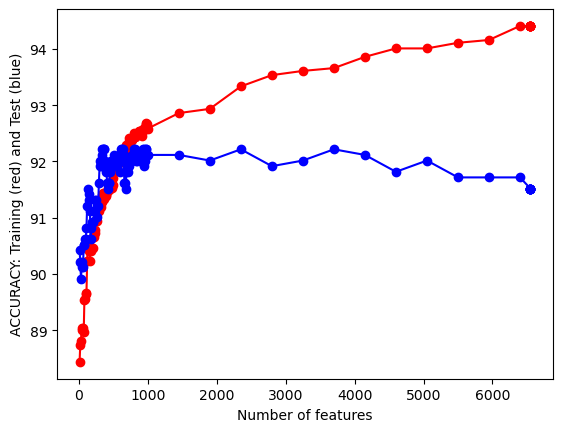

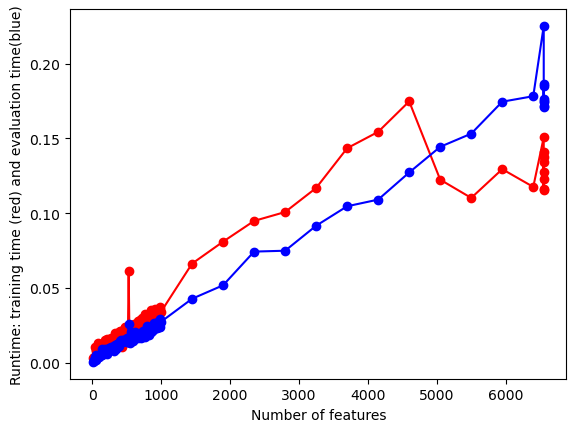

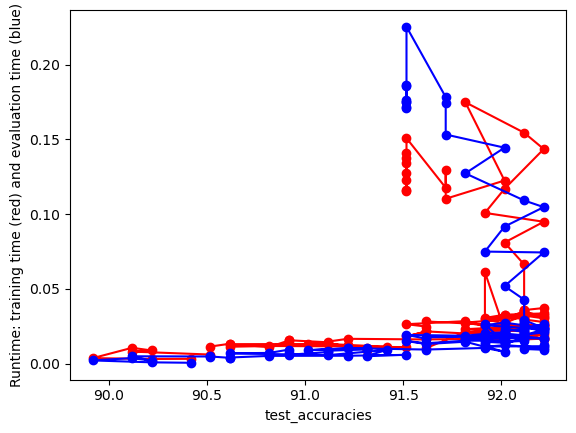

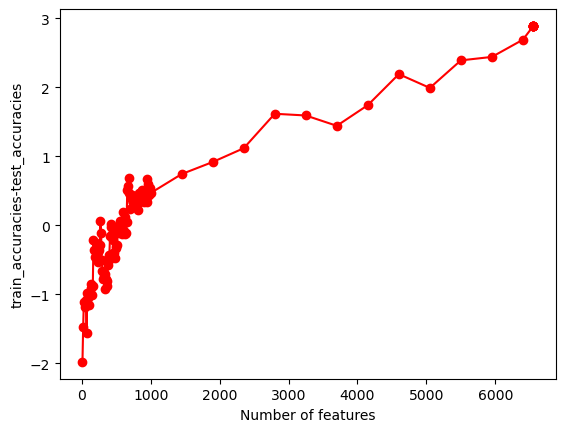

In [47]:
save_results('results/')
plot_results('results/')

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
#training model
#feature num=640

In [50]:
x_final=x[:,0:640]

In [51]:
import random
N=x_final.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

In [52]:

#SPLIT
x_train=x_final[train_index]
y_train=y[train_index].flatten()

x_test=x_final[test_index]
y_test=y[test_index].flatten()

# INITIALIZE MODEL 
model = MultinomialNB()

# TRAIN MODEL 
model.fit(x_train,y_train)

yp_train = model.predict(x_train)
yp_test = model.predict(x_test)
val_matrix=confusion_matrix(y_test,yp_test)

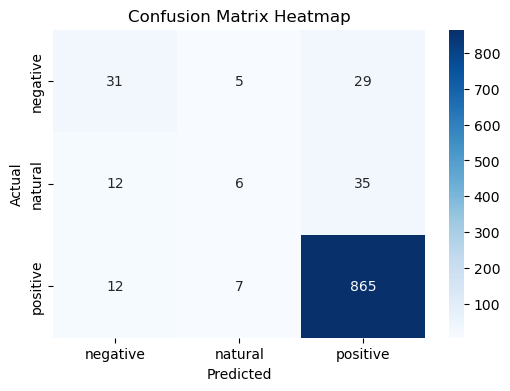

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels (optional, for labeling the axes)
class_labels = ['negative', 'natural', 'positive']

# Create a heatmap from the confusion matrix
plt.figure(figsize=(6, 4))  # Set the figure size (optional)
sns.heatmap(val_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title (optional)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Show the heatmap
plt.show()

In [54]:
accuracy_score(y_test,yp_test)

0.9001996007984032

In [55]:
def get_metrics(y_true, y_preds, pred_proba=None):
    print(f'Accuracy Score: {accuracy_score(y_true, y_preds)}')
    if pred_proba is not None:
        print(f'ROC AUC Score: {roc_auc_score(y_true, pred_proba, multi_class="ovo")}')
    print(classification_report(y_true, y_preds))
    plt.figure(figsize=(18,6))
    sns.heatmap(confusion_matrix(y_true, y_preds), annot=True)

Accuracy Score: 0.9001996007984032
              precision    recall  f1-score   support

          -1       0.56      0.48      0.52        65
           0       0.33      0.11      0.17        53
           1       0.93      0.98      0.95       884

    accuracy                           0.90      1002
   macro avg       0.61      0.52      0.55      1002
weighted avg       0.88      0.90      0.88      1002



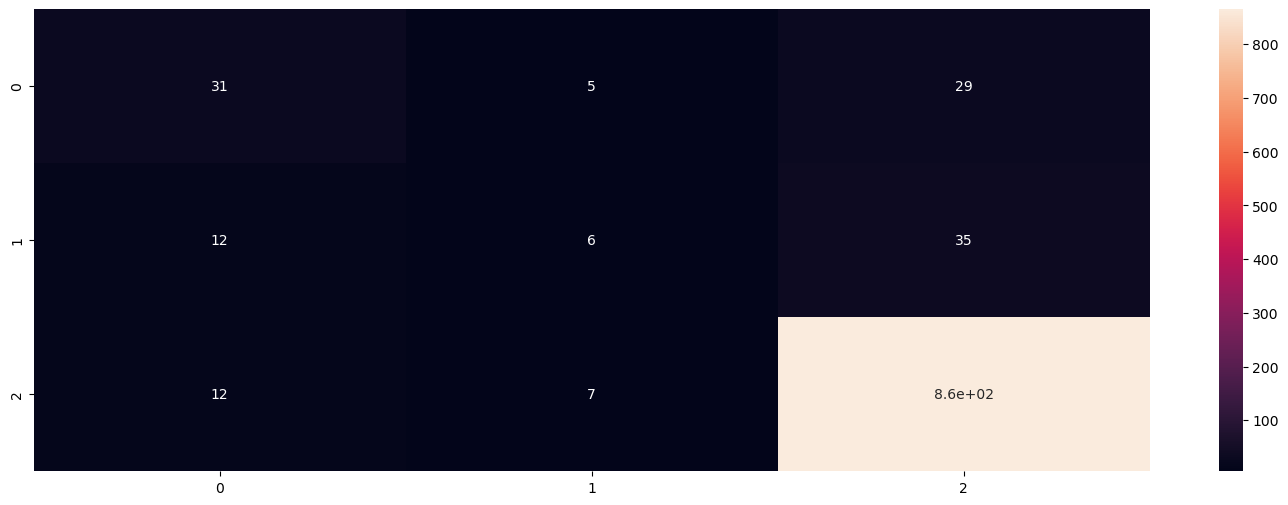

In [56]:
get_metrics(y_test,yp_test)